## Lecture 9 Example

**One-Way ANOVA: analysis of completely randomised single-factor experiments**

---

A tyre manufacturer wishes to investigate the rate of wear (in mm) on their products and whether this rate differs substantially among the four possible positions that the tyre can occupy on a car:

- ``Pos1`` - front left tyre
- ``Pos2`` - front right tyre
- ``Pos3`` - rear left tyre
- ``Pos4`` - rear right tyre

Tyre manufacturer is also interested in the average effects on wear of

- front versus rear tyres

- left versus right tyres

The experimental data is given in [tyres.csv](https://raw.githubusercontent.com/uqglmn/sm/main/anova/tyres.csv). At this stage, ignore the ``Car`` variable in the data.


**1.1.** Read and visually inspect the data.

In [1]:
tyres = read.csv("https://raw.githubusercontent.com/uqglmn/sm/main/anova/tyres.csv")
str(tyres)

'data.frame':	9 obs. of  5 variables:
 $ Car : chr  "A" "A" "A" "B" ...
 $ Pos1: num  20.9 19 20.3 17.1 15.9 ...
 $ Pos2: num  18.3 21.2 19.4 14.8 11.3 ...
 $ Pos3: num  28.5 28 30.1 37.2 38.9 ...
 $ Pos4: num  20.2 18.8 19.2 34.3 34.7 ...


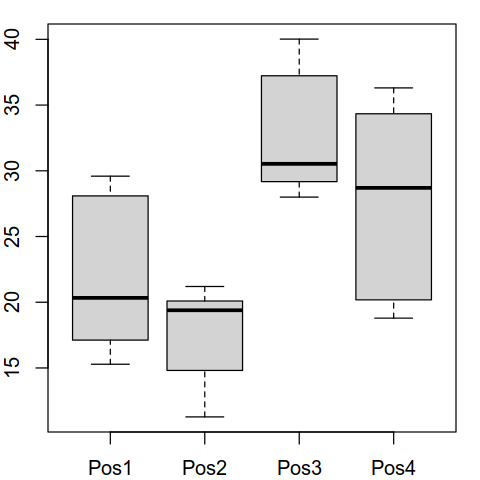

In [2]:
# drop Car variable and draw a boxplot to inspect group means
options(repr.plot.width=4, repr.plot.height=4)
par(mar=c(2,2,1,1))

tyres$Car = NULL  # delete this column
boxplot(tyres)

There is a clear difference in the mean wear between front and rear tyres, but not so obvious between left and right tyres. Moreover, the differences may be due to a chance alone.

**1.2.** Carry out a one-way ANOVA to test the hypothesis, with a 95% confidence level, that all positions have the same effect on the tyre wear, that is

$$
H_0 : \alpha_1 = \alpha_2 = \alpha_3 = \alpha_4 = 0 \quad\text{vs.}\quad H_1 : \text{ at least one } \alpha_i \ne 0
$$

You need to construct an analysis of variance table and compute the test statistic. You will need to use the formulas below:

$$
SS_T = \sum_{i=1}^a \sum_{j=1}^{n_i} (y_{ij}-\bar y_{\bullet\bullet})^2 \qquad
SS_B=\sum_{i=1}^a n_i \left(\bar y_{i \bullet} - \bar y_{\bullet \bullet}\right)^2  \qquad
SS_E=\sum_{i=1}^a \sum_{j=1}^{n_i} \left(y_{ij}-\bar y_{i \bullet}\right)^2
$$

$$
MS_B = \frac{SS_B}{a-1} \qquad
MS_E = \frac{SS_E}{N-a} \qquad
F = \frac{MS_B}{MS_E} 
$$

where $a$ is the number of treatment groups and $N = \sum_{i=1}^{a} n_i$ is the total number of observations.


In [3]:
a = ncol(tyres)  # a=4
n = nrow(tyres)  # n=9
N = a*n

In [4]:
group_means = colMeans(tyres)         # group means
grand_mean  = mean(as.matrix(tyres))  # grand mean 

SST = sum( (tyres - grand_mean)^2 )
SSB = n*sum( (group_means - grand_mean)^2 )
SSE = sum( (t(tyres) - group_means)^2 )   # note the transpose of data!!!!

all.equal(SST,SSB+SSE)

[1] TRUE

In [5]:
MSB = SSB/(a-1)
MSE = SSE/(N-a)
F = MSB/MSE

In [6]:
# One-Way ANOVA table
table = data.frame(row.names=c("Between groups", "Within groups", "Total"),
                   dof=c(a-1,N-a,N-1),
                   SS=c(SSB,SSE,SST),
                   MS=c(MSB,MSE,NA),
                   F=c(F,NA,NA),
                   P=c(1-pf(F,a-1,N-a),NA,NA)
                  ) 
                   
round(table, 3)      

,dof,SS,MS,F,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Between groups,3,1189.014,396.338,13.739,0
Within groups,32,923.119,28.847,NA,NA
Total,35,2112.132,NA,NA,NA


**Conclusions.** The calculated P-value is $P_{cal}\approx 0$, thus we reject the null hypothesis that all positions have the same effect on the tyre wear.

*Verify our computatons using built-in statistical functions:*

In [7]:
# prepare data
tyres0 = stack(tyres)
names(tyres0) = c("wear", "position")
head(tyres0)

,wear,position
,<dbl>,<fct>
1,20.935,Pos1
2,19.013,Pos1
3,20.332,Pos1
4,17.123,Pos1
5,15.919,Pos1
6,15.285,Pos1


In [8]:
model = aov(wear~position, data=tyres0)
summary.aov(model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
position     3 1189.0   396.3   13.74 6.28e-06 ***
Residuals   32  923.1    28.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**1.3.** Conduct residual analysis. Comment on the plots.

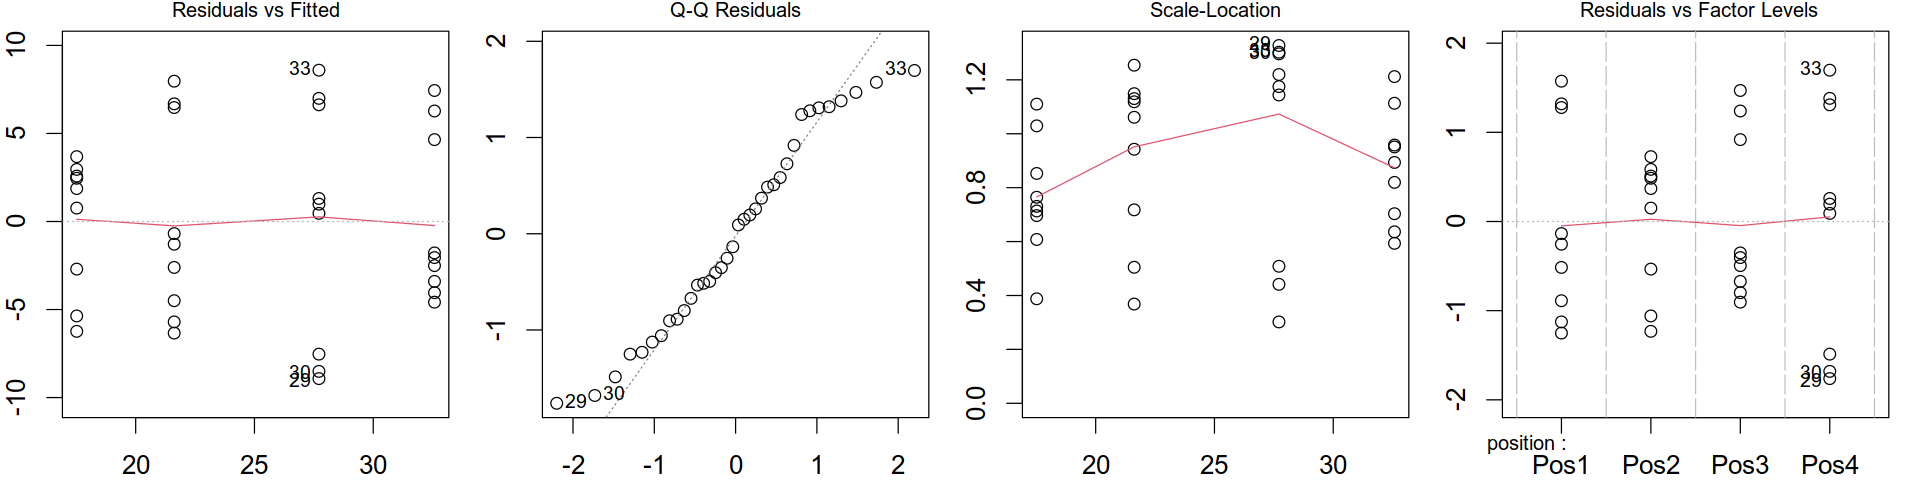

In [9]:
options(repr.plot.width=16, repr.plot.height=4)
par(mfrow=c(1,4), mar=c(2,2,1,1), cex=1.3)
plot(model)

In [10]:
# Test the hypothesis that sigma1 = sigma2 = sigma3 = sigma4 = sigma
library(car) 
round(leveneTest(wear~position, data=tyres0),3)

Loading required package: carData



,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>
group,3,0.865,0.469
,32,NA,NA


Since $P_{cal} = 46.9\%$, we accept the hypohtesis that all groups have the same variance.

**1.4.** Construct linear orthogonal single degree of freedom contrasts to compare the average effects on wear of

- front versus rear tyres

- left versus right tyres

and carry out the corresponding significance tests with a 95% confidence level. Recall that two linear contrasts $l_1 = (l_{11}, \ldots, l_{1a})$ and $l_2=(l_{21}, \ldots, l_{2a})$ are orhtogonal if

$$
\sum_{i=1}^a n_i l_{1i} l_{2i} = 0
$$

The corresppning sums of squares and the $F$-statistics are computed using

$$
z_w = \sum_{i=1}^a l_{wi} y_{i\bullet} \qquad
D_w = \sum_{i=1}^a n_i l_{wi}^2 \qquad
SS_w = \frac{z_w^2}{D_w} \qquad
F_w = \frac{SS_w}{MS_E} \sim F_{1,N-a} 
$$

In [11]:
# linear contrasts
l1 = c(+1,+1,-1,-1) # front vs rear
l2 = c(+1,-1,+1,-1) # left vs right
l3 = c(+1,-1,-1,+1) # cross effect

c( l1 %*% l2, l1 %*% l3, l2 %*% l3 ) # check orthogonality

[1] 0 0 0

In [12]:
z1 = sum( l1 * colSums(tyres) )
z2 = sum( l2 * colSums(tyres) )
z3 = sum( l3 * colSums(tyres) )

In [13]:
D1 = n*sum( l1^2 )
D2 = n*sum( l2^2 )
D3 = n*sum( l3^2 )

In [14]:
SS1 = z1^2/D1
SS2 = z2^2/D2
SS3 = z3^2/D3

all.equal(SSB,SS1+SS2+SS3)  # check that SSB decomposes into SS1, SS2, and SS3

[1] TRUE

In [15]:
F1 = SS1/MSE  # MS1=SS1/1
F2 = SS2/MSE  # MS2=SS2/1
F3 = SS3/MSE  # MS3=SS3/1

In [16]:
# One-Way ANOVA table for linear contrasts
table = data.frame(row.names=c("Between groups",
                               "Front vs Rear", "Left vs Right", "Cross constrast",
                               "Within/Residual", "Total"),
                   dof=c(a-1,1,1,1,N-a,N-1),
                   SS=c(SSB,SS1,SS2,SS3,SSE,SST),
                   MS=c(MSB,SS1,SS2,SS3,MSE,NA),
                   F=c(F,F1,F2,F3,NA,NA),
                   P=c(1-pf(F,a-1,N-a),1-pf(F1,1,N-a),1-pf(F2,1,N-a),1-pf(F3,1,N-a),NA,NA)
                  ) 
                   
round(table, 3)

,dof,SS,MS,F,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Between groups,3,1189.014,396.338,13.739,0.000
Front vs Rear,1,1006.793,1006.793,34.901,0.000
Left vs Right,1,180.920,180.920,6.272,0.018
Cross constrast,1,1.300,1.300,0.045,0.833
Within/Residual,32,923.119,28.847,NA,NA
Total,35,2112.132,NA,NA,NA


**Conclusions:** 

- There is a statistically significant difference in tyre wear between front and rear tyres.
- There is a significant difference in tyre wear between left and right tyres.
- There is no significant difference in tyre wear between diagonal and anti-diagonal tyres.

*Verify our computatons using built-in statistical functions:*

In [17]:
levels(tyres0$position)  # inspect the order of levels

[1] "Pos1" "Pos2" "Pos3" "Pos4"

In [18]:
# input contrasts
contrasts(tyres0$position) = cbind(l1,l2,l3)
clist = c("front vs rear"=1, "left vs right"=2, "cross contrast"=3)

In [19]:
model = aov(wear~position, data=tyres0)
summary.aov(model, split=list(position=clist))

                           Df Sum Sq Mean Sq F value   Pr(>F)    
position                    3 1189.0   396.3  13.739 6.28e-06 ***
  position: front vs rear   1 1006.8  1006.8  34.901 1.42e-06 ***
  position: left vs right   1  180.9   180.9   6.272   0.0176 *  
  position: cross contrast  1    1.3     1.3   0.045   0.8332    
Residuals                  32  923.1    28.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

---